In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

**Discussion Question 1:** In slides.

_____

In [2]:
survey = Table.read_table('welcome_survey_sp24.csv')
survey.show(6)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position,Pets,TV,Piercings
Second Year,7,5,7,Right-handed,On your back,a little brother,Black Mirror,3
Second Year,3,6,7,Right-handed,On your right side,Bird,nan,0
Second Year,3,8,6,Right-handed,On your right side,Bird,The Bear,0
First Year,4,4,7,Right-handed,On your left side,Bird,Gilmore Girls,1
Second Year,3,3,7,Right-handed,On your stomach,Bird,nan,2
Second Year,4,4,7,Right-handed,On your right side,Bird,The Bear,2


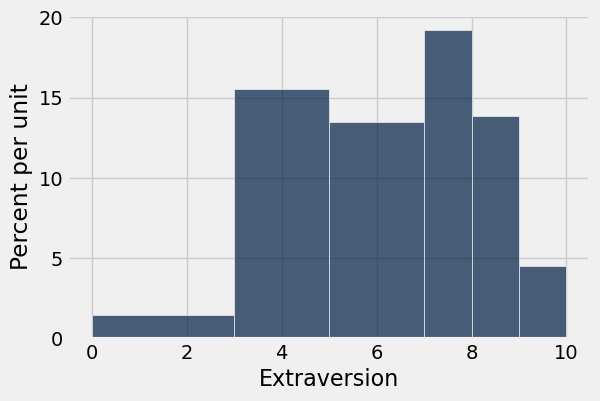

In [3]:
survey.hist('Extraversion',  bins = make_array(0, 3, 5, 7, 8, 9, 10))

**Discussion Question 2**: Which (maybe more than one) of these *are*
bins in the histogram? 

- $[0,3)$
- $(3,5]$
- $[5,7]$
- $[7,8)$
- $[10,\infty)$

___

In [9]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies.show(6)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956


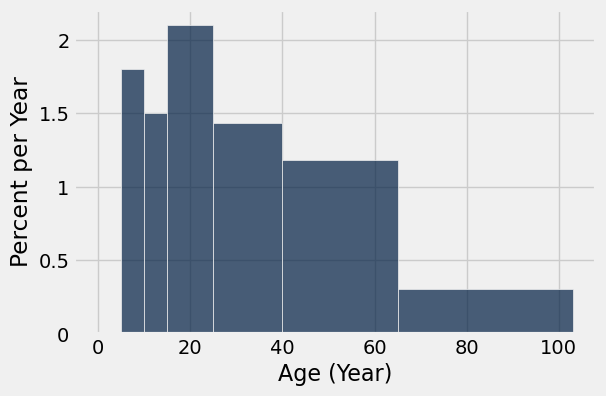

In [10]:
ages = 2024 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 103)
top_movies.hist('Age', bins = my_bins, unit = 'Year')

**Discussion Question 3**: Compare the bins $[25, 40)$ and $[40, 65)$. 

- Which one has more movies?
- Which one is more crowded?

## New material

### Create functions with a definition

```python
def functionname(Arguments_Parameters_Expressions_or_Values):  
    """docstring"""
      return return_expression
```

#### **Task:** Create a function that takes a numerical input and triples it.

In [11]:
def triple(x):
    """triples the numerical input"""
    return 3 * x

In [12]:
triple(3)

9

In [13]:
num = 4

In [14]:
triple(num)

12

In [15]:
triple(num * 5)

60

**Note:** Functions are type-agnostic.

In [16]:
triple(np.arange(4))

array([0, 3, 6, 9])

In [17]:
triple('ha')

'hahaha'

**Discussion Question 4:**

- What type of input does `f` take?
- What type of output does `f` produce?
- What's a good name for the function (and what might go in the docstring)?

```python
def f(s):    
    """docstring"""
      return np.round(s / sum(s) * 100, 2)
```

In [4]:
def f(s):
    """docstring"""
    return np.round(s / sum(s) * 100, 2)

In [ ]:
first_four=make_array(1,2,3,4)
first_four

In [ ]:
f(first_four)

In [ ]:
f(make_array(1, 213, 38))

_____

**Task:** Calculate the hypotenuse length of a right triangle.

Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [19]:
def hypotenuse(x, y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [ ]:
hypotenuse(1, 2)

In [ ]:
hypotenuse(3, 4)

In [ ]:
hypotenuse(9, 12)

**Discussion Question 5**: We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [18]:
def hypotenuse(x,y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    return (x ** 2 + y ** 2) ** 0.5

____

#### **Task:** Create a function that takes the year of birth of a person and produces their age in years.

In [7]:
def age(year):
    """returns age in years"""
    age = 2024 - year
    return age

In [ ]:
age(1942)

#### **Task:** Create a function that:
- takes a person's name and year of birth (two arguments). 
- produces a sentence that states how old they are.

In [20]:
def name_and_age(name, year):
    """returns a sentence stating a person's age in years"""
    return name + ' is ' + str(age(year)) + ' years old.'

In [21]:
name_and_age('Joe', 1942)

'Joe is 82 years old.'

### Use functions on table columns with `apply` 

In [22]:
fam = Table().with_columns(
    'First Name', make_array('Cristina', 'Azalea', 'Farah', 'Izzy', 'Lubo'),
    'Birth Year', make_array(2005, 2004, 2004, 2005, 2004)
)
fam

First Name,Birth Year
Cristina,2005
Azalea,2004
Farah,2004
Izzy,2005
Lubo,2004


In [23]:
make_array(age(fam.column('Birth Year').item(0)),
           age(fam.column('Birth Year').item(1)),
           age(fam.column('Birth Year').item(2)),
           age(fam.column('Birth Year').item(3)),
           age(fam.column('Birth Year').item(4)))

array([19, 20, 20, 19, 20])

In [24]:
fam.apply(age, 'Birth Year')

array([19, 20, 20, 19, 20])

In [25]:
fam.apply(name_and_age, 'First Name', 'Birth Year')

array(['Cristina is 19 years old.', 'Azalea is 20 years old.',
       'Farah is 20 years old.', 'Izzy is 19 years old.',
       'Lubo is 20 years old.'],
      dtype='<U25')

In [26]:
fam.with_columns("Statement",
                 fam.apply(name_and_age, 'First Name', 'Birth Year'))

First Name,Birth Year,Statement
Cristina,2005,Cristina is 19 years old.
Azalea,2004,Azalea is 20 years old.
Farah,2004,Farah is 20 years old.
Izzy,2005,Izzy is 19 years old.
Lubo,2004,Lubo is 20 years old.
